## PROJECT:

# 🦋BUTTERFLIES SPECIES IDENTIFICATION🦋

### WorkFlow:

1. #### Image Dataset preparation:
* *collect Images* :  
       
                      collected   images relevant to the classification task.

* *Organize in folders* : 

                      Cretaed folders for each class.

* *split Dataset*:  

                      Separate images into **Train** and **Test , val** folders , having same classes in the folders.

2. #### Image Preprocessing:

- Load Images : 

                 Read images from Train and test Folders.

- resize: 

                 Equally resize the images to match the input size of the model.(eg:224*224)

- Rescale : 

                 Normalize Pixel values (eg:scale between 0-1)

3. ## Building the Model :
* ### Convolutional Neural Network:(CNN)
      - Convolutional Layer: Extract features from images.
      - Pooling layer: Downsample features to reduce Complexity
      - Flatten: Convert 2D feature maps into a 1D vector.

  ### Fully connected layer:(ANN)
      - connect flattened features to dense layers for classification.


## Images Dataset:


* *Source of Images:* 

                        Dataset collected from open source i.e Kaggle

* *Dataset Structure:* 

                        Images are organized into class folders , ready for CNN processing.

butterflies folder

│
├── Class_1 (e.g., Monarch)

     image1.jpg
     image2.jpg
     ...

│
├── Class_2 (e.g., Swallowtail)

     image1.jpg 
     image2.jpg
     ...

│
├── Class_3 (e.g., Painted Lady)

     image1.jpg
     image2.jpg
     ...

│
└── ... (Total: 75 classes)


### Importing required libraries:

In [1]:
! pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt

In [3]:
# these are the required constants for image classification
batch_size = 32
image_size = 256
channels = 3
epochs = 10

#### Importing data into tensorflow dataset object:

* In tensorflow , the image_dataset_from_directory function is used to load image data from a directory.

* Handles both data loading and preprocessing.

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Butterflies",
    shuffle = True,
    seed = 123,
    image_size = (image_size,image_size),
    batch_size = batch_size

)

Found 6499 files belonging to 75 classes.


In [5]:
class_names = dataset.class_names
class_names

['ADONIS',
 'AFRICAN GIANT SWALLOWTAIL',
 'AMERICAN SNOOT',
 'AN 88',
 'APPOLLO',
 'ATALA',
 'BANDED ORANGE HELICONIAN',
 'BANDED PEACOCK',
 'BECKERS WHITE',
 'BLACK HAIRSTREAK',
 'BLUE MORPHO',
 'BLUE SPOTTED CROW',
 'BROWN SIPROETA',
 'CABBAGE WHITE',
 'CAIRNS BIRDWING',
 'CHECQUERED SKIPPER',
 'CHESTNUT',
 'CLEOPATRA',
 'CLODIUS PARNASSIAN',
 'CLOUDED SULPHUR',
 'COMMON BANDED AWL',
 'COMMON WOOD-NYMPH',
 'COPPER TAIL',
 'CRECENT',
 'CRIMSON PATCH',
 'DANAID EGGFLY',
 'EASTERN COMA',
 'EASTERN DAPPLE WHITE',
 'EASTERN PINE ELFIN',
 'ELBOWED PIERROT',
 'GOLD BANDED',
 'GREAT EGGFLY',
 'GREAT JAY',
 'GREEN CELLED CATTLEHEART',
 'GREY HAIRSTREAK',
 'INDRA SWALLOW',
 'IPHICLUS SISTER',
 'JULIA',
 'LARGE MARBLE',
 'MALACHITE',
 'MANGROVE SKIPPER',
 'MESTRA',
 'METALMARK',
 'MILBERTS TORTOISESHELL',
 'MONARCH',
 'MOURNING CLOAK',
 'ORANGE OAKLEAF',
 'ORANGE TIP',
 'ORCHARD SWALLOW',
 'PAINTED LADY',
 'PAPER KITE',
 'PEACOCK',
 'PINE WHITE',
 'PIPEVINE SWALLOW',
 'POPINJAY',
 'PURPLE HAIRS

### Visualizing some of the images from my dataset


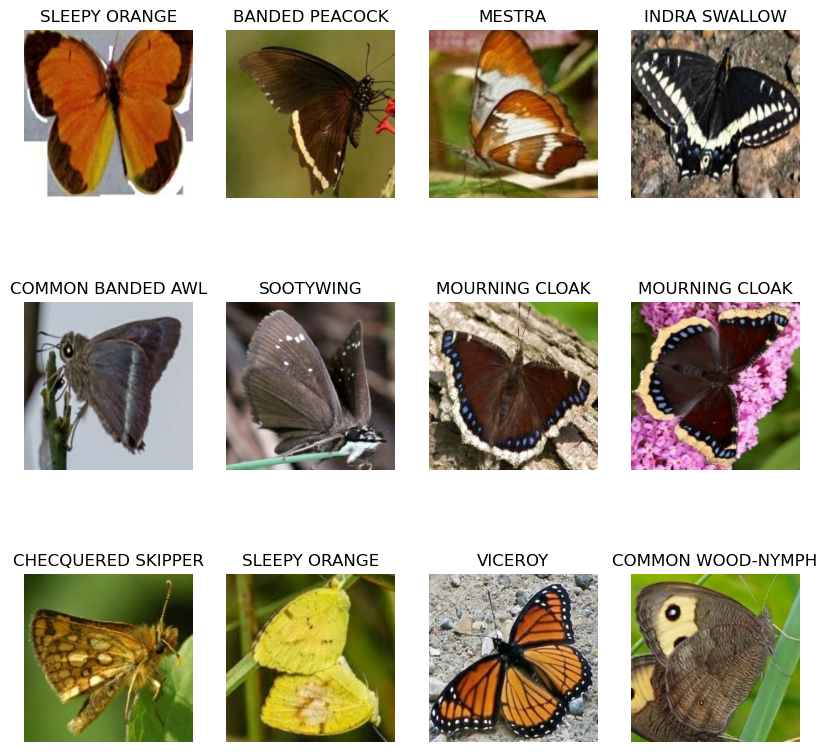

In [6]:
plt.figure(figsize=(10,10))
for image_batch , labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3 , 4 , i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[labels_batch[i]])
        plt.axis('off')

### Train_Test_split

Dataset should be divided into 3parts namely:

Training:


          Dataset to be used while training.

Validation: 

          Dataset to be tested against while training


Testing:

          Dataset to be  tested against after we trained a model


training ===> 80%

testing--> 10%

validation-->10%

In [7]:
len(dataset)

204

In [8]:
train_size = 0.8
len(dataset)*train_size

163.20000000000002

In [9]:
train_data = dataset.take(163)
len(train_data)

163

In [10]:
test_data = dataset.skip(163)
len(test_data)

41

In [11]:
val_size = 0.1
len(dataset)*val_size

20.400000000000002

In [12]:
val_data = test_data.take(20)
len(val_data)

20

In [13]:
test_data = test_data.skip(20)
len(test_data)

21

In [14]:
def train_val_test_split(ds , train_split = 0.8 , val_split = 0.1 , test_split = 0.1 , shuffle=True , shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size , seed=12)


    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = int(test_split * ds_size)

    train_data = ds.take(train_size)
    val_data = ds.skip(train_size).take(val_size)
    test_data = ds.skip(train_size).skip(val_size)

    return train_data , val_data , test_data

In [15]:
train_data , val_data , test_data = train_val_test_split(dataset)

In [16]:
print(len(train_data))
print(len(val_data))
print(len(test_data))

163
20
21


### Cache, Shuffle, and Prefetch the Dataset

#### Cache:

   In deep learning , Caching works like if some data does not change , the computer saves it in a "shortcut" memory.

   This avoids wasting time by reading the same thing again and again.


### Prefetch:


In deep learning , prefetch works like while the computer is learning from the current set of data , prefetch gets the next set of data ready.

This makes the learning process faster because the computer does not have to wait.

In [17]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Gets the next set of data ready while the computer is working so there is no delay.

saves data that does not change so the computer does not have to reload it every time

## Preparing Images for CNN Models

*Loading Images:*

               We organize our images into folders for training and testing. Each folder has categories (classes) to help the CNN learn.

*Creating More Images (Augmentation):*

               When we don’t have many images, we use image augmentation to create new ones by slightly modifying the originals.

How it Works:

Imagine taking a photo and:

Rotating it slightly.

Zooming in or out.

Flipping it sideways or upside down.

Shifting it a little.

These small changes give the  more variety to learn.


Augmentation helps when we have fewer images by teaching the model to handle different scenarios, making it smarter and more accurate.

Easy with Keras:

Keras has a tool called ImageDataGenerator that automatically creates these variations while training, saving us time and effort.


In short, augmentation makes the most of what we have, helping the AI learn better with limited data.

         Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [18]:
Data_Agumentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

##### Creating a Layer for Resizing and Normalization

Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 255). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it

In [19]:
resize_rescale = tf.keras.Sequential([
    layers.Resizing(image_size,image_size),
    layers.Rescaling(1./255)
])

#### Applying data Agumentation to train dataset

In [20]:
train_data = train_data.map(
    lambda x, y: (Data_Agumentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

## Model Architecture

We use a CNN  with a Softmax activation in the output layer.

We also add the initial layers for resizing , rescaling , and data Agumentaion.

**We are going to use Convolutional Neural Network(CNN) here.**

**CNN is popular for image classification tasks.**

In [21]:
input_shape = (batch_size , image_size , image_size , channels)
n_classes = 75

In [22]:
model = models.Sequential([
    resize_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),




    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

c:\Users\Mounika Reddy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 57600)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 75)               │         4,875 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,747,659 (14.30 MB)

 Trainable params: 3,747,659 (14.30 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model:

We use "adam" Optimizer, "SparseCategoricalCrossentropy" for losses, "accuracy" as a metric

In [24]:
model.compile(
    optimizer = 'adam' , 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    train_data ,
    batch_size = batch_size,
    validation_data = val_data,
    verbose = 1,
    epochs = 10
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 193s 996ms/step - accuracy: 0.0256 - loss: 4.4680 - val_accuracy: 0.0531 - val_loss: 4.0346
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.0743 - loss: 3.7843 - val_accuracy: 0.1422 - val_loss: 3.3234
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 156s 958ms/step - accuracy: 0.1692 - loss: 3.2268 - val_accuracy: 0.2219 - val_loss: 2.9953
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 154s 936ms/step - accuracy: 0.2192 - loss: 2.9261 - val_accuracy: 0.2719 - val_loss: 2.7647
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 126s 773ms/step - accuracy: 0.2734 - loss: 2.6855 - val_accuracy: 0.2609 - val_loss: 2.6636
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 126s 771ms/step - accuracy: 0.3370 - loss: 2.4259 - val_accuracy: 0.3438 - val_loss: 2.4179
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 126s 770ms/step - accuracy: 0.3629 - loss: 2.2900 - val_accuracy: 0.3328 - val_loss: 2.3628
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 126s 769ms/step - accuracy: 0.3958 - lo

In [26]:
scores = model.evaluate(test_data)
scores

21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 212ms/step - accuracy: 0.4681 - loss: 1.9014


[1.8866066932678223, 0.4672619104385376]

#### Plotting the Accuracy and Loss Curves

In [27]:
history

In [28]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 163}

In [29]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [30]:
history.history['loss'][:5] # show loss for first 5 epochs

[4.241248607635498,
 3.6362509727478027,
 3.1438798904418945,
 2.863548517227173,
 2.6483049392700195]

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

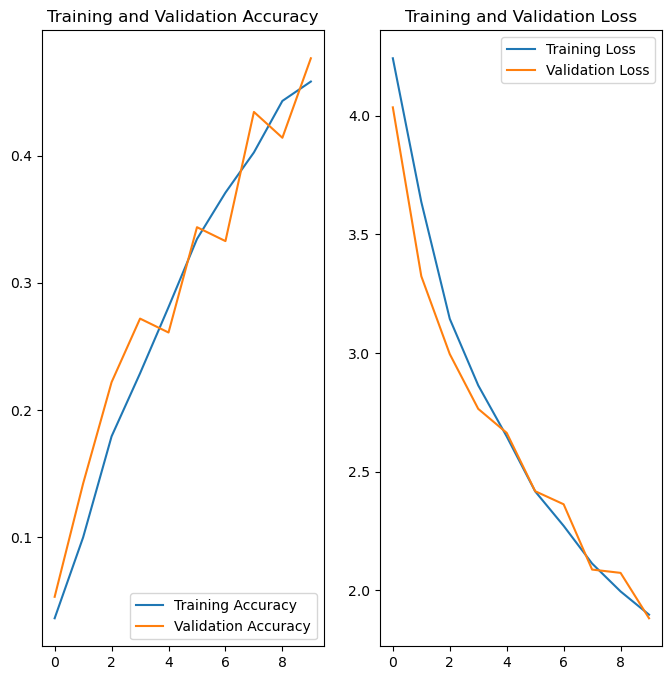

In [32]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Run prediction on a sample image

first image to predict
actual label: GREY HAIRSTREAK
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
predicted label: LARGE MARBLE


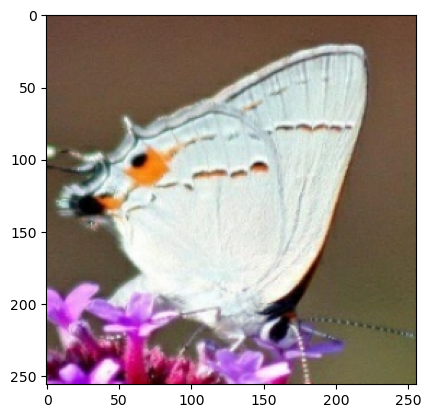

In [33]:
import numpy as np
for images_batch, labels_batch in test_data.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


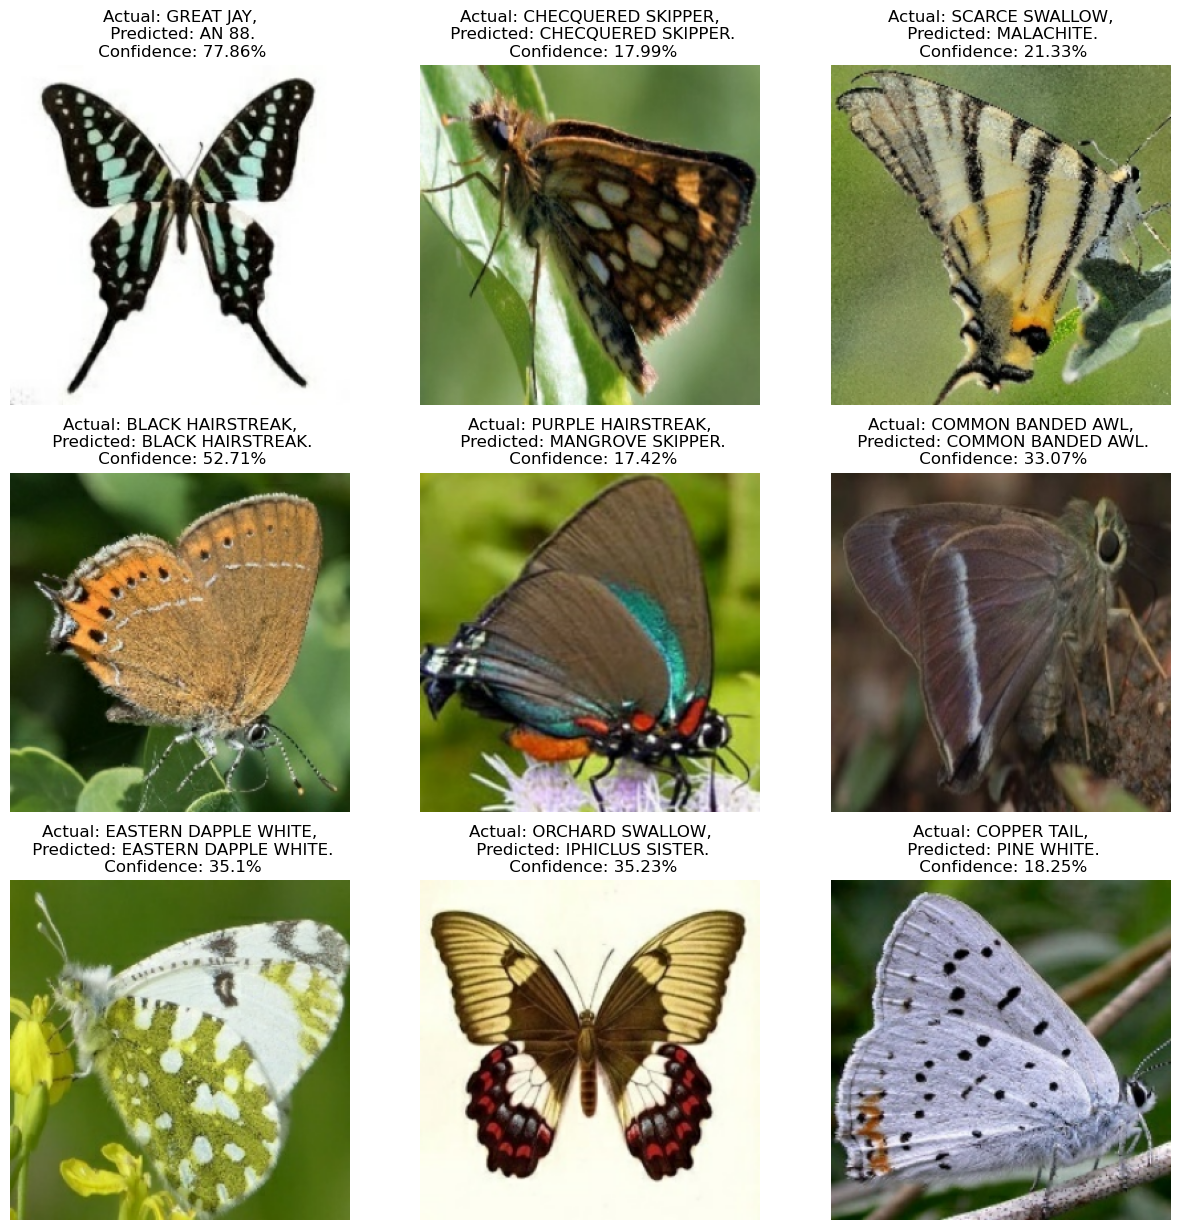

In [36]:
plt.figure(figsize=(15, 15))
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [38]:
model.save("Models/butterflies.h5")